In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('Housing.csv')


In [7]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
## DATA PREPROCESSING ##

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.shape

(545, 13)

In [12]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

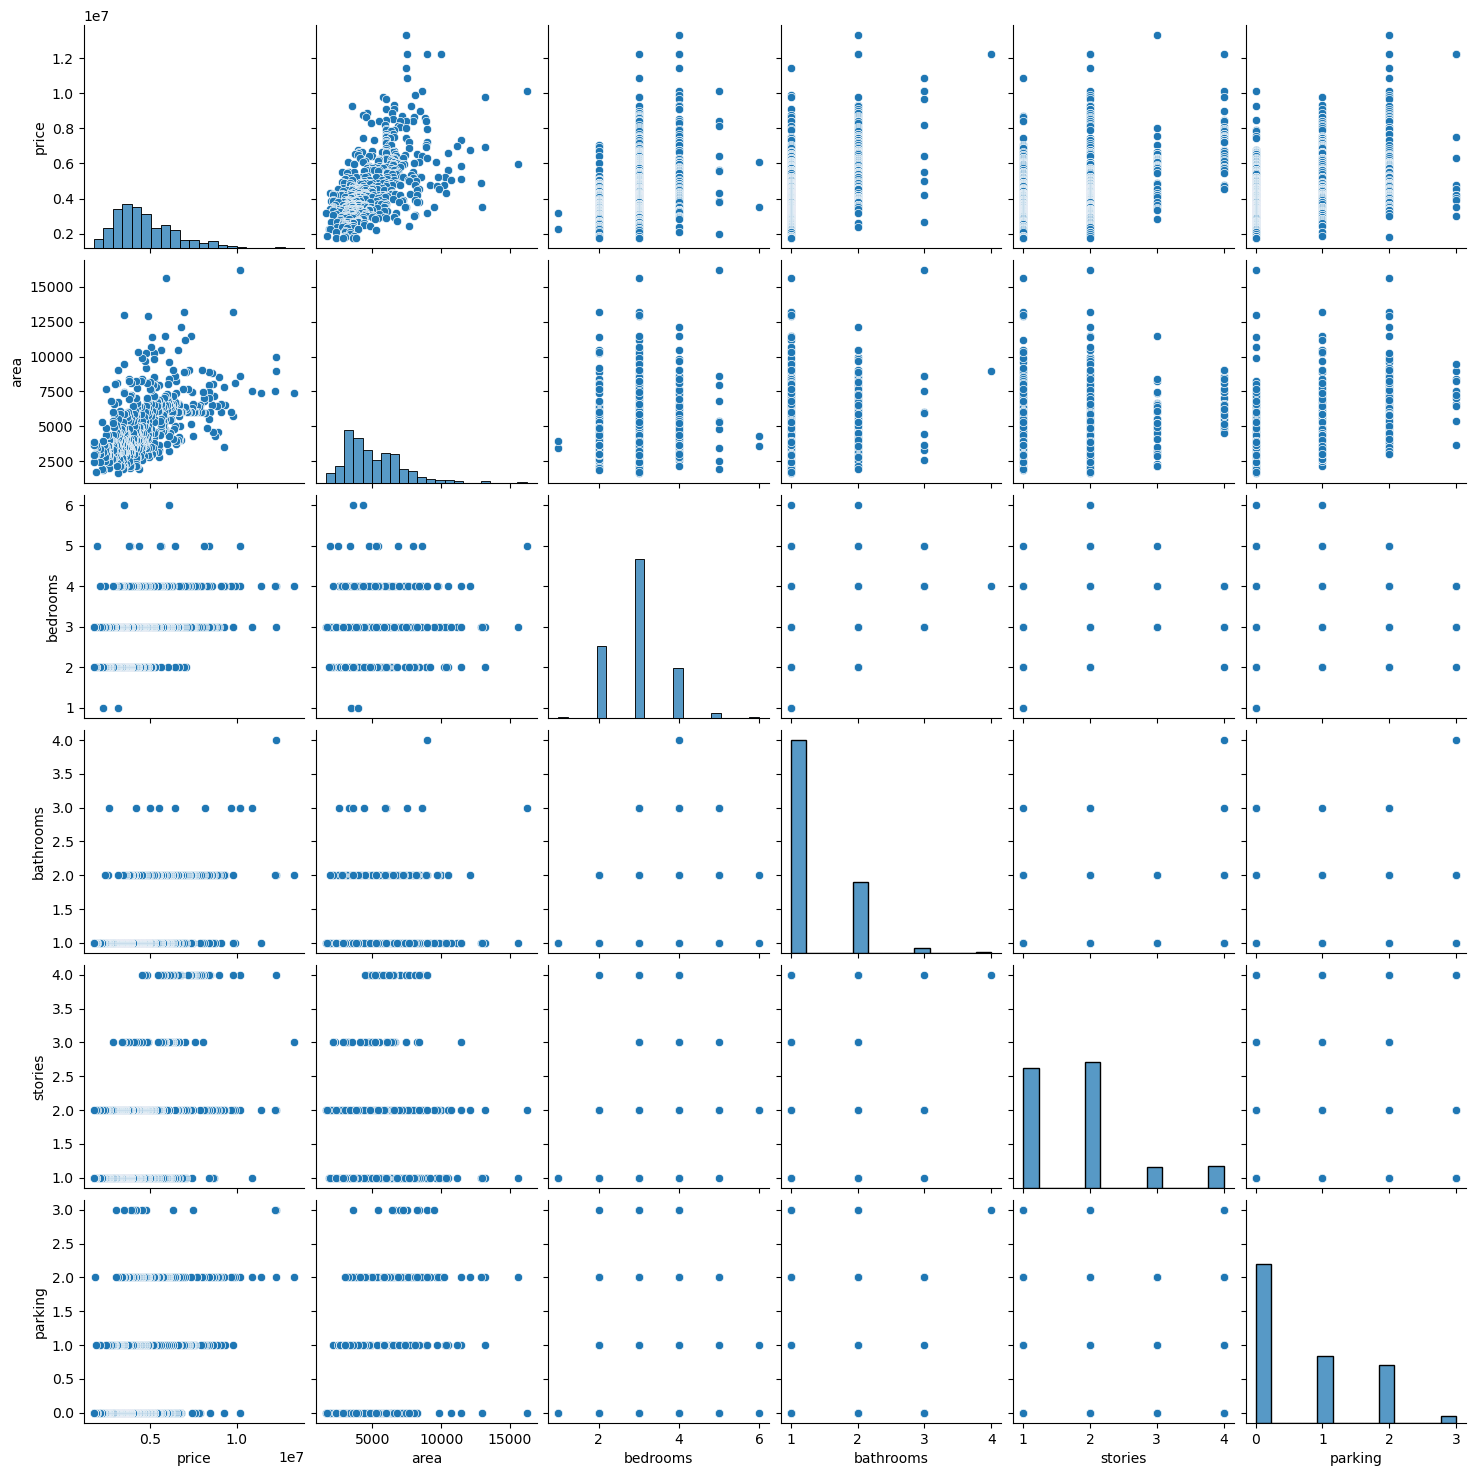

In [15]:
## VISUALIZATION ##

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)


In [16]:
## CLASSIFICATION  OF CATEGORICAL DATA ##

print(df.mainroad.value_counts())
print(df.guestroom.value_counts())
print(df.basement.value_counts())
print(df.hotwaterheating.value_counts())
print(df.airconditioning.value_counts())
print(df.prefarea.value_counts())
print(df.furnishingstatus.value_counts())


yes    468
no      77
Name: mainroad, dtype: int64
no     448
yes     97
Name: guestroom, dtype: int64
no     354
yes    191
Name: basement, dtype: int64
no     520
yes     25
Name: hotwaterheating, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64
no     417
yes    128
Name: prefarea, dtype: int64
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


In [17]:
df['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [18]:
df['bathrooms'].value_counts()

1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64

In [19]:
df['stories'].value_counts()

2    238
1    227
4     41
3     39
Name: stories, dtype: int64

In [20]:
df['parking'].value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

In [21]:
df['area'].value_counts()

6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64

In [23]:
## CHANGING THE CATEGORICAL ATTRIBUTES INTO NUMERIC DATA FOR BETTER ANALYSIS ##

df.replace({'mainroad':{'yes':0,'no':1}},inplace=True)
df.replace({'guestroom':{'yes':0,'no':1}},inplace=True)
df.replace({'basement':{'yes':0,'no':1}},inplace=True)
df.replace({'hotwaterheating':{'yes':0,'no':1}},inplace=True)
df.replace({'airconditioning':{'yes':0,'no':1}},inplace=True)
df.replace({'prefarea.value':{'yes':0,'no':1}},inplace=True)
df.replace({'furnishingstatus':{'furnished':0,'semi-furnished':1,'unfurnished':2}},inplace=True)

In [24]:
## hot encoding ##
df = pd.get_dummies(df,drop_first=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,prefarea_yes
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,1
1,12250000,8960,4,4,4,0,1,1,1,0,3,0,0
2,12250000,9960,3,2,2,0,1,0,1,1,2,1,1
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,1
4,11410000,7420,4,1,2,0,0,0,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,2,0
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,0
542,1750000,3620,2,1,1,0,1,1,1,1,0,2,0
543,1750000,2910,3,1,1,1,1,1,1,1,0,0,0


In [25]:
## Splitting the data ##

x = df.drop(['price'], axis=1) 
y = df['price']
print(len(x), len(y))
print(x)
print(y)
print(x.shape)
print(y.shape)


545 545
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         0          1         1   
1    8960         4          4        4         0          1         1   
2    9960         3          2        2         0          1         0   
3    7500         4          2        2         0          1         0   
4    7420         4          1        2         0          0         0   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         0          1         0   
541  2400         3          1        1         1          1         1   
542  3620         2          1        1         0          1         1   
543  2910         3          1        1         1          1         1   
544  3850         3          1        2         0          1         1   

     hotwaterheating  airconditioning  parking  furnishingstatus  prefarea_yes  
0                  1  

In [26]:
## Training and Test Data ##
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=1/10,random_state=0)

In [27]:
## Linear Regression ##

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.6167018298753526

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [29]:
t_data_predic = regressor.predict(x_train)

In [30]:
## Error Calculation ##

from sklearn import metrics
error_score = metrics.r2_score(y_train, t_data_predic)
print("R squared Error : ", error_score)

R squared Error :  0.6836517746805287


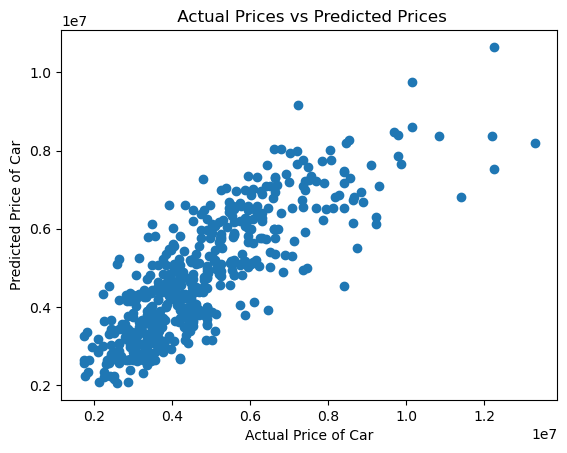

In [31]:
## Plotting THE data ## 

plt.scatter(y_train, t_data_predic)
plt.xlabel("Actual Price of Car")
plt.ylabel("Predicted Price of Car")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [32]:
 ## prediction on Test data ##
t_data_predic = regressor.predict(x_test)

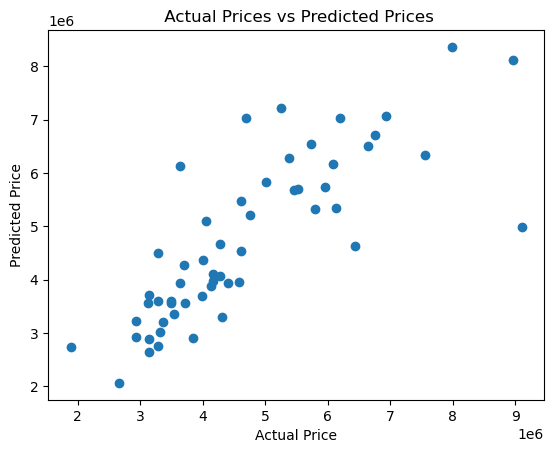

In [33]:
plt.scatter(y_test, t_data_predic)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

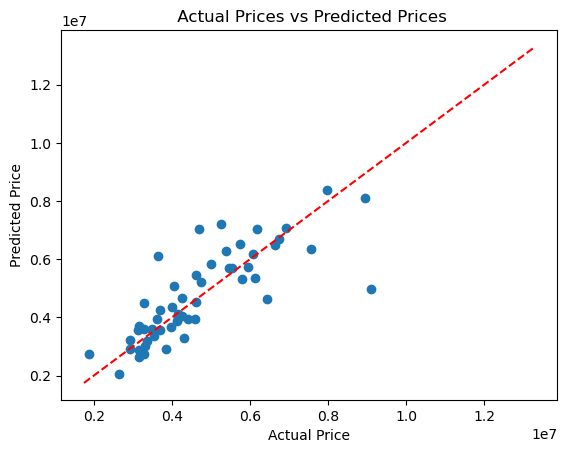

In [35]:
plt.scatter(y_test, t_data_predic)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
plt.show()

In [36]:
b = regressor.coef_
print("Coefficient :",b)

Coefficient : [ 2.47133589e+02  1.19610191e+05  1.01501859e+06  4.42554554e+05
 -4.13328625e+05 -4.03165037e+05 -3.37574049e+05 -1.05647054e+06
 -8.85606823e+05  2.63424448e+05 -1.96010630e+05  6.69004383e+05]


In [37]:
a = regressor.intercept_
print("Intercept :",a)

Intercept : 3132124.8084780285
